<a href="https://colab.research.google.com/github/minjeong-kim-git/Kaggle-Practice/blob/main/Day%2009/ML05_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day05: CNN

- **Team ID** : 03조

- Write and run the code below in jupyter notebook
- After completion, rename the file, and summit the file to e-class
- Submit file name : **“ML01\_<#조\>.ipynb”**, send me 김동현 <donghyunkim1217@gmail.com>
  - Ex) ML01\_#조\.ipynb
- Due : **오늘 16:59pm**

# 1. Convolutional Neural Netowks

### Image Classification with CNNs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Load and Preprocess the Fashion-MNIST Dataset

In [2]:
# load the fashioin_mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

In [3]:
# scaling X
X_train, X_test = X_train / 255.0, X_test / 255.0
num_classes = 10

In [4]:
# Expand dimension (Channel dim), and check shape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [5]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

In [6]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_train.shape

(60000, 1)

In [7]:
y_test = y_test.reshape(y_test.shape[0], 1)
y_test.shape

(10000, 1)

In [8]:
# show y_train
y_train

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

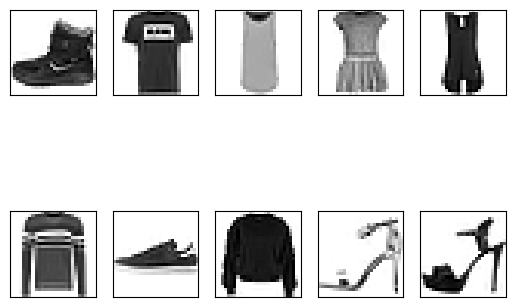

In [9]:
# show first 10 images

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

### Build the CNN model

In [10]:
# CNN model with 2 convolution layers
#    1. 32 3x3 filters, padding="same", input_shape = (28, 28, 1), activation="relu"
#    2. 64 3x3 filters, activation="relu"
# and max pooling layer with size=2
# and 2 dense layers (128, 10)
#    3. 128, activation="relu"
#    4. 10, activation="softmax"
layers = tf.keras.layers
base_model = tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3),
                  padding = "same", input_shape = (28, 28, 1), activation = "relu"),
    layers.Conv2D(64, kernel_size=(3, 3), activation = "relu"),
    layers.MaxPool2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(128, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

### Compile the model

In [11]:
# compile the model with loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']
base_model.compile(loss = 'sparse_categorical_crossentropy',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

### Train the model

In [12]:
# train the CNN model with X_train, y_train, 10 epochs, validation_data=(X_test, y_test)
base_history = base_model.fit(X_train, y_train, epochs = 10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 22s 8ms/step - loss: 0.3546 - accuracy: 0.8718 - val_loss: 0.2758 - val_accuracy: 0.8998
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2154 - accuracy: 0.9211 - val_loss: 0.2396 - val_accuracy: 0.9106
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1599 - accuracy: 0.9414 - val_loss: 0.2183 - val_accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1181 - accuracy: 0.9564 - val_loss: 0.2153 - val_accuracy: 0.9266
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0857 - accuracy: 0.9682 - val_loss: 0.2536 - val_accuracy: 0.9243
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0610 - accuracy: 0.9772 - val_loss: 0.3032 - val_accuracy: 0.9232
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0444 - accuracy: 0.9838 - val_loss: 0.3328 - val_accurac

### Plot the loss

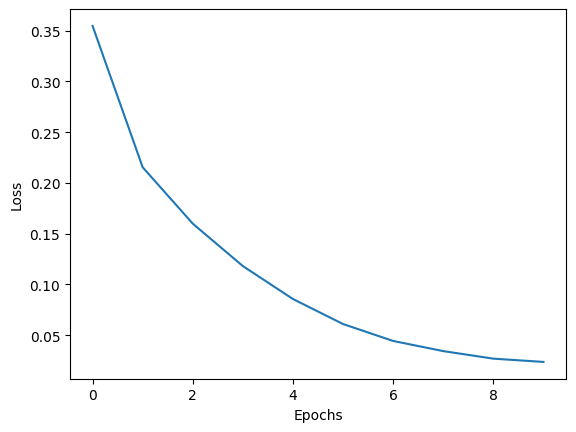

In [13]:
# plot the loss. use history.history['loss']
plt.plot(base_history.epoch, base_history.history['loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Evaluate the base model

In [14]:
# Train and test accuracy. use evaluate()

loss, acc = base_model.evaluate(X_train, y_train)
print('Train accuracy : %.4f' % acc)
loss, acc = base_model.evaluate(X_test, y_test)
print('Test accuracy : %.4f' % acc)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0126 - accuracy: 0.9965
Train accuracy : 0.9965
313/313 [==============================] - 1s 3ms/step - loss: 0.3747 - accuracy: 0.9267
Test accuracy : 0.9267


### The model with dropout regularization

In [15]:
# Base CNN model + dropout with 0.5 before the last layer
layers = tf.keras.layers
dropout_model = tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3),
                  padding = "same", input_shape = (28, 28, 1), activation = "relu"),
    layers.Conv2D(64, kernel_size=(3, 3), activation = "relu"),
    layers.MaxPool2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(128, activation = "relu"),
    layers.Dense(10, activation = "softmax"),
    layers.Dropout(0.5)
])

dropout_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

### Compile the dropout model

In [16]:
# compile the model
dropout_model.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

### Train the dropout model

In [17]:
# train the dropout model with X_train, y_train, 10 epochs, validation_data=(X_test, y_test)
drop_history = dropout_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 3.1309 - accuracy: 0.4359 - val_loss: 3.1503 - val_accuracy: 0.7828
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.4719 - accuracy: 0.4724 - val_loss: 2.2701 - val_accuracy: 0.8420
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3271 - accuracy: 0.4831 - val_loss: 2.2619 - val_accuracy: 0.8443
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2728 - accuracy: 0.4877 - val_loss: 2.0247 - val_accuracy: 0.8619
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 2.2085 - accuracy: 0.4871 - val_loss: 2.0168 - val_accuracy: 0.8630
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1556 - accuracy: 0.4902 - val_loss: 2.0038 - val_accuracy: 0.8642
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.1333 - accuracy: 0.4966 - val_loss: 2.0136 - val_accurac

### Plot the loss

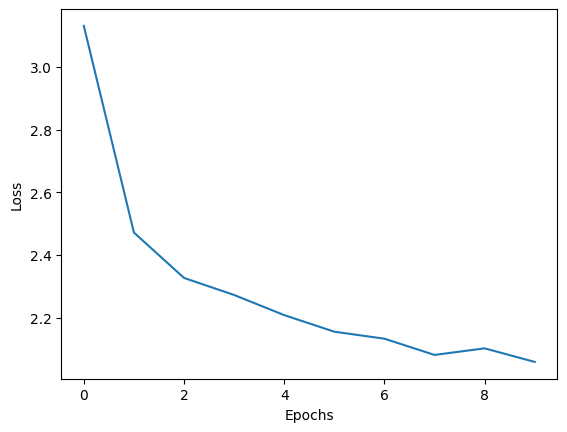

In [18]:
# plot the loss. use history.history['loss']
plt.plot(drop_history.epoch, drop_history.history['loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Evaluate the dropout model

In [19]:
# Train and test accuracy. use evaluate()
loss, acc = dropout_model.evaluate(X_train, y_train)
print('Train accuracy : %.4f' % acc)
loss, acc = dropout_model.evaluate(X_test, y_test)
print('Test accuracy : %.4f' % acc)

1875/1875 [==============================] - 5s 3ms/step - loss: 1.6665 - accuracy: 0.8899
Train accuracy : 0.8899
313/313 [==============================] - 1s 3ms/step - loss: 1.8725 - accuracy: 0.8754
Test accuracy : 0.8754


### Plotting the learning curves

(0.0, 9.0)

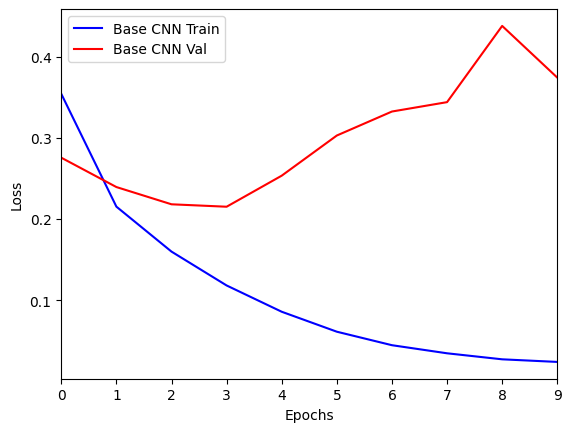

In [20]:
# plot the train/validation losses for each model
plt.plot(base_history.epoch, base_history.history['loss'], color='blue', label='Base CNN Train')
plt.plot(base_history.epoch, base_history.history['val_loss'], color='red', label='Base CNN Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim([0,max(base_history.epoch)])

(0.0, 9.0)

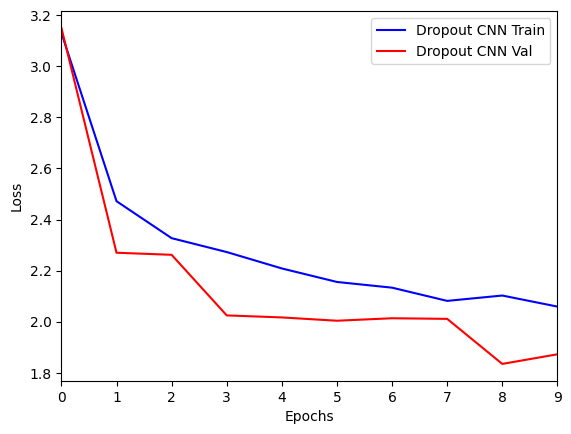

In [21]:
# plot the train/validation losses for each model
plt.plot(drop_history.epoch, drop_history.history['loss'], color='blue', label='Dropout CNN Train')
plt.plot(drop_history.epoch, drop_history.history['val_loss'], color='red', label='Dropout CNN Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim([0,max(drop_history.epoch)])

---

# 2. Dealing with missing data

### Sample data

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/data/sample-missing-data.csv')
df

,A,B,C,label
0,1,0.1,10.0,0
1,2,0.2,20.0,0
2,2,0.1,NaN,1
3,3,0.3,20.0,1
4,2,0.2,NaN,0


In [24]:
#check if there are missing values. use .isnull() and .sum()
df.isnull().sum()

A        0
B        0
C        2
label    0
dtype: int64

### Removing a feature

In [25]:
# remove feature 'C'. use .drop()
df_remove_feature = df.drop(['C'], axis=1)
df_remove_feature

,A,B,label
0,1,0.1,0
1,2,0.2,0
2,2,0.1,1
3,3,0.3,1
4,2,0.2,0


### Removing data with missing values

In [26]:
# remove rows that contain missing values. use .dropna()
df_remove_rows = df.dropna(axis=0)
df_remove_rows

,A,B,C,label
0,1,0.1,10.0,0
1,2,0.2,20.0,0
3,3,0.3,20.0,1


In [27]:
# remove colomns that contain missing values. use .dropna()
df_remove_columns = df.dropna(axis=1)
df_remove_columns

,A,B,label
0,1,0.1,0
1,2,0.2,0
2,2,0.1,1
3,3,0.3,1
4,2,0.2,0


### Imputing missing values

In [28]:
# Impute missing values to mean. use .fillna()
df = df.fillna(df.mean())
df

,A,B,C,label
0,1,0.1,10.000000,0
1,2,0.2,20.000000,0
2,2,0.1,16.666667,1
3,3,0.3,20.000000,1
4,2,0.2,16.666667,0


### Imputing missing values using scikit learn

In [29]:
# get X array from df dataframe
X = df.values
print(X)

[[ 1.          0.1        10.          0.        ]
 [ 2.          0.2        20.          0.        ]
 [ 2.          0.1        16.66666667  1.        ]
 [ 3.          0.3        20.          1.        ]
 [ 2.          0.2        16.66666667  0.        ]]


In [30]:
from sklearn.impute import SimpleImputer

# replace missing values, encoded as np.nan, using the mean value of the columns
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr.fit(X)

imputed_X = imr.transform(X)
print(imputed_X)

[[ 1.          0.1        10.          0.        ]
 [ 2.          0.2        20.          0.        ]
 [ 2.          0.1        16.66666667  1.        ]
 [ 3.          0.3        20.          1.        ]
 [ 2.          0.2        16.66666667  0.        ]]


---

# 2. Handling categorical feature values

### Sample data
- color : norminal
- size : ordinal  

In [31]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class3'],
                   ['red', 'M', 14.5, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class1
2,blue,XL,15.3,class3
3,red,M,14.5,class2


In [32]:
pdf = df.copy()   # for pandas
sdf = df.copy()   # for scikit learn

### Encoding class labels

In [33]:
# Label encoding using pandas. use .map()
label_mapping = {'class1': 0, 'class2': 1, 'class3': 2 }

pdf['classlabel'] = pdf['classlabel'].map(label_mapping)
pdf

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,0
2,blue,XL,15.3,2
3,red,M,14.5,1


In [34]:
from sklearn.preprocessing import LabelEncoder

# Label encoding using scikit learn. use LabelEncoder
enc = LabelEncoder()

sdf['classlabel'] = enc.fit_transform(sdf['classlabel'])
sdf

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,0
2,blue,XL,15.3,2
3,red,M,14.5,1


### Encoding feature values

### Encoding ordinal features

In [35]:
# encoding ordinal features using pandas
size_mapping = {'M': 0, 'L': 1, 'XL': 2 }

pdf['size'] = pdf['size'].map(size_mapping)
pdf

,color,size,price,classlabel
0,green,0,10.1,0
1,red,1,13.5,0
2,blue,2,15.3,2
3,red,0,14.5,1


In [36]:
from sklearn.preprocessing import OrdinalEncoder

# encoding ordinal features  scikit learn. use OrdinalEncoder
enc = OrdinalEncoder(categories=[['M', 'L', 'XL']])

sdf[['size']] = enc.fit_transform(sdf[['size']])
sdf

,color,size,price,classlabel
0,green,0.0,10.1,0
1,red,1.0,13.5,0
2,blue,2.0,15.3,2
3,red,0.0,14.5,1


### One-hot encoding of nominal features

In [37]:
# one-hot encoding 'color' using pandas. use get_dummies()
pd.get_dummies(pdf, 'color')

,size,price,classlabel,color_blue,color_green,color_red
0,0,10.1,0,0,1,0
1,1,13.5,0,0,0,1
2,2,15.3,2,1,0,0
3,0,14.5,1,0,0,1


In [38]:
from sklearn.preprocessing import OneHotEncoder

# one-hot encoding 'color' using scikit learn. use OneHotEncoder
enc = OneHotEncoder(sparse_output = False)

color_enc = enc.fit_transform(sdf[['color']])
print(color_enc)

# remake the data frame. use .concat()
sdf_color_enc = pd.DataFrame(color_enc, columns=['color0', 'color1', 'color2',])
sdf = pd.concat([sdf_color_enc, sdf[['size', 'price', 'classlabel']]], axis=1)
sdf

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


,color0,color1,color2,size,price,classlabel
0,0.0,1.0,0.0,0.0,10.1,0
1,0.0,0.0,1.0,1.0,13.5,0
2,1.0,0.0,0.0,2.0,15.3,2
3,0.0,0.0,1.0,0.0,14.5,1


---

# 3. Transformation of numerical feature values

### Loading Wine Dataset

In [39]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Get X and y. Splitting data into 70% training, 30% test

In [40]:
from sklearn.model_selection import train_test_split

# Get X and y. use .iloc[ , ]. Class label is at column 0
X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values

# Get training and test data. use train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=0, stratify=y)

In [41]:
print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


### Normalization

In [43]:
from sklearn.preprocessing import MinMaxScaler

# transform training and test data to min 0, max 1. use MinMaxScaler()
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [44]:
# check normalized data
print(X_train[0:3, 0:5])
print(X_train_norm[0:3, 0:5])

[[ 13.62   4.95   2.35  20.    92.  ]
 [ 13.76   1.53   2.7   19.5  132.  ]
 [ 13.73   1.5    2.7   22.5  101.  ]]
[[0.64619883 0.83201581 0.4248366  0.46236559 0.27160494]
 [0.6871345  0.15612648 0.65359477 0.43548387 0.7654321 ]
 [0.67836257 0.15019763 0.65359477 0.59677419 0.38271605]]


### Standardization

In [45]:
from sklearn.preprocessing import StandardScaler

# transform training and test data to mean 0, variance 1
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [46]:
# check standardized data
print(X_train[0:3, 0:5])
print('mean[0] = %.2f \n' % X_train[:,0].mean())
print(X_train_std[0:3, 0:5])
print('mean[0] = %.2f \n' % X_train_std[:,0].mean())

[[ 13.62   4.95   2.35  20.    92.  ]
 [ 13.76   1.53   2.7   19.5  132.  ]
 [ 13.73   1.5    2.7   22.5  101.  ]]
mean[0] = 13.03 

[[ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733]
 [ 0.88229214 -0.70457155  1.17533605 -0.09065504  2.34147876]
 [ 0.84585645 -0.73022996  1.17533605  0.81104754  0.13597904]]
mean[0] = 0.00 

